In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
airbnb_df = pd.read_csv('airbnb.csv')
crime_df = pd.read_csv('cw2018.csv')

C:\Users\junnk\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (44,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
new_crime_df = crime_df.groupby('community').count()
print(new_crime_df)

                        Latitude  Longitude  CrimeType  CrimeWeight
community                                                          
ALBANY PARK                 2237       2237       2237         2237
ARCHER HEIGHTS               774        774        774          774
ARMOUR SQUARE                960        960        960          960
ASHBURN                     2187       2187       2187         2187
AUBURN GRESHAM              6754       6754       6754         6754
AUSTIN                     13849      13849      13849        13849
AVALON PARK                 1063       1063       1063         1063
AVONDALE                    2168       2168       2168         2168
BELMONT CRAGIN              3945       3945       3945         3945
BEVERLY                      812        812        812          812
BRIDGEPORT                  1390       1390       1390         1390
BRIGHTON PARK               2011       2011       2011         2011
BURNSIDE                     353        353     

In [7]:
new_airbnb_df2 = new_airbnb_df.groupby('community').median()
print(new_airbnb_df2)

                                id  price
community                                
ALBANY PARK             25690485.0   65.0
ARCHER HEIGHTS          31874230.0   85.0
ARMOUR SQUARE           27786281.0   74.5
ASHBURN                 20836169.0   65.0
AUBURN GRESHAM          27014287.0   60.0
AUSTIN                  27610896.0   72.0
AVALON PARK             29663566.0   80.0
AVONDALE                25075222.5   90.0
BELMONT CRAGIN          27757906.5   60.0
BEVERLY                 23436637.0   60.0
BRIDGEPORT              27004197.5   75.0
BRIGHTON PARK           28410137.0   69.0
CALUMET HEIGHTS         28718680.0   30.0
CHATHAM                 25884182.5   51.5
CHICAGO LAWN            26423697.0   57.0
CLEARING                23895370.0   60.0
DOUGLAS                 27276029.0   86.0
DUNNING                 21667420.0   69.0
EAST GARFIELD PARK      22754683.0   49.0
EDGEWATER               21933351.0   85.0
EDISON PARK             29395575.0  100.0
ENGLEWOOD               22944270.5

In [8]:
merge_table = pd.merge(new_crime_df, new_airbnb_df2, right_index=True, left_index=True)
merge_table.head()

,Latitude,Longitude,CrimeType,CrimeWeight,id,price
community,,,,,,
ALBANY PARK,2237,2237,2237,2237,25690485.0,65.0
ARCHER HEIGHTS,774,774,774,774,31874230.0,85.0
ARMOUR SQUARE,960,960,960,960,27786281.0,74.5
ASHBURN,2187,2187,2187,2187,20836169.0,65.0
AUBURN GRESHAM,6754,6754,6754,6754,27014287.0,60.0


In [9]:
y = merge_table['price'].values.reshape(-1, 1)
x = merge_table['CrimeType'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)

score = model.score(x, y)
coefficient = model.coef_
intercept = model.intercept_
print(score)
print(coefficient)
print(intercept)

0.021648169133891892
[[0.00190893]]
[73.43373936]


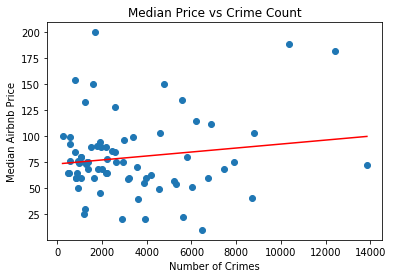

In [15]:
x_min = np.array([[x.min()]])
x_max = np.array([[x.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.xlabel("Number of Crimes")
plt.ylabel("Median Airbnb Price")
plt.title("Median Price vs Crime Count")
plt.scatter(x, y)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

plt.show()